In [1]:
import os
import cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

DATA_RAW_PATH = os.path.abspath(os.path.join(
    os.getcwd(), "../data/raw"))
DATA_OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), "../data/output"))

# To get the example images that below worked on please first run the download_assets.py file

In [2]:
DATA_BOAT_RAW_PATH = os.path.abspath(os.path.join(
    os.getcwd(), "../data/raw/boat"))

#### Steps for Creating Panoramas

1. Find keypoints in all images
2. Find pairwise correspondences
2. Estimate pairwise Homographies
3. Refine Homographies
3. Stitch with Blending

In [13]:
# Read Images

imagefiles = glob.glob(f"{DATA_BOAT_RAW_PATH}/boat{os.sep}*")
imagefiles.sort()


images = []
for i in range(1, 7):
    img_bgr = cv2.imread(f"{DATA_BOAT_RAW_PATH}/boat{i}.jpg", cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

num_images = len(images)

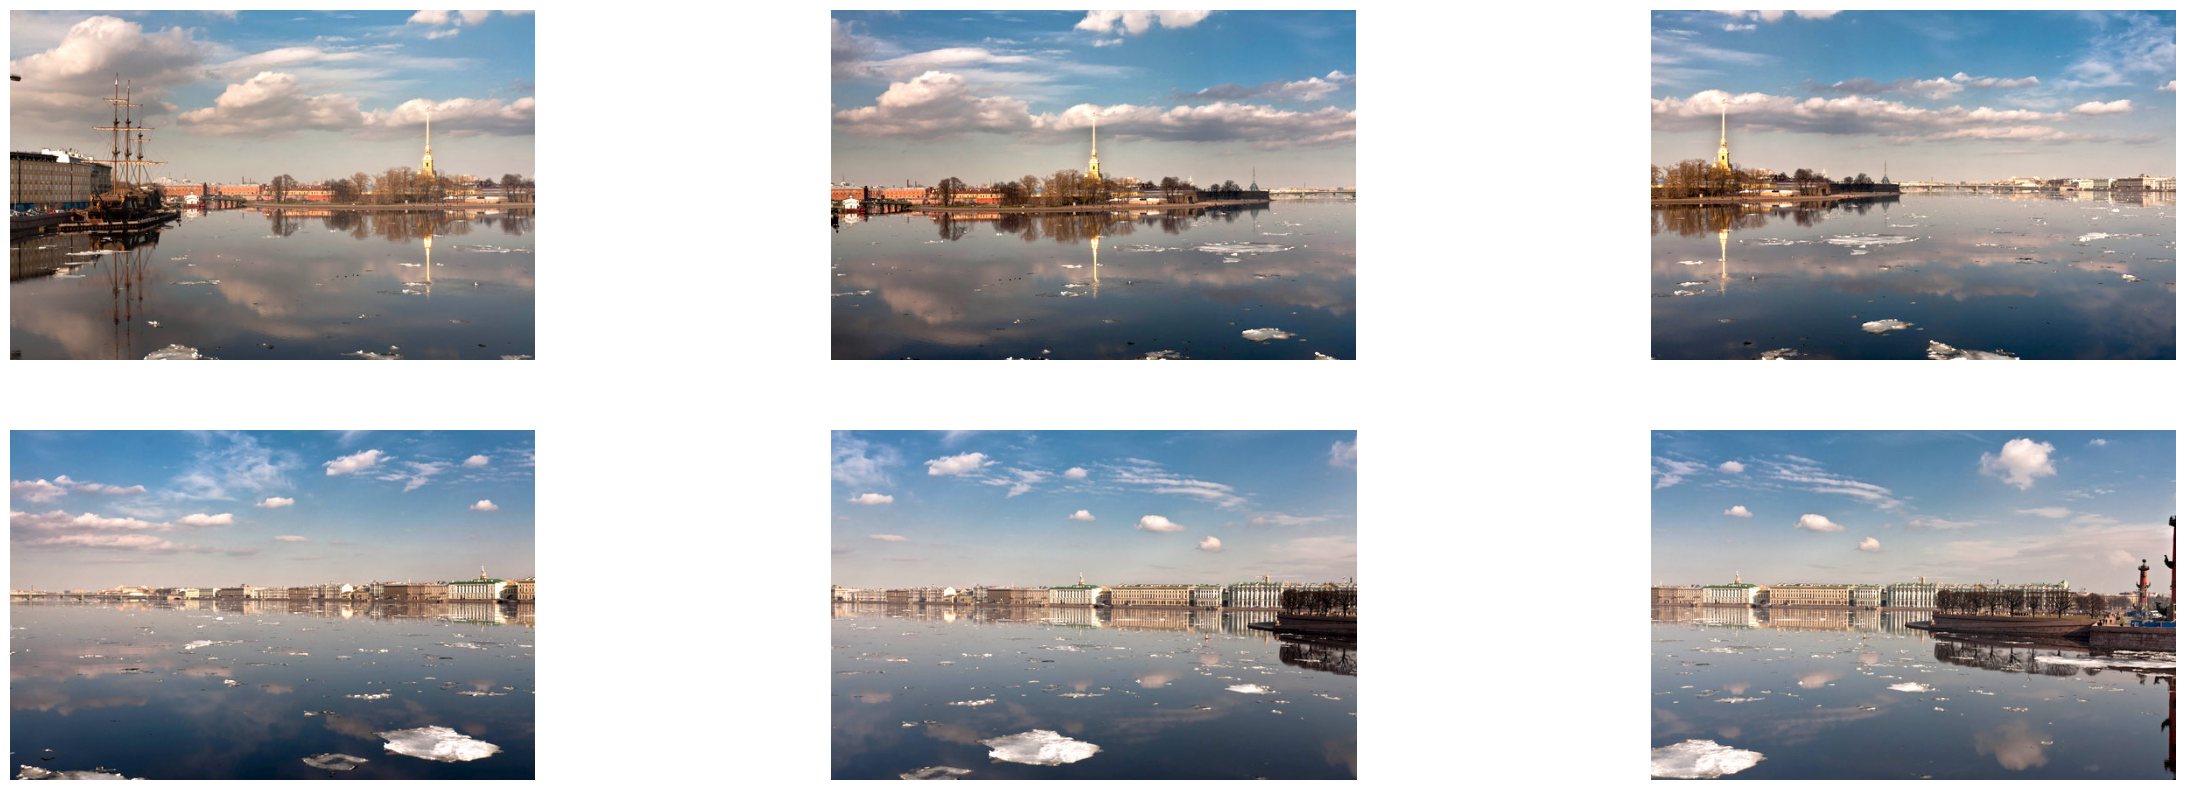

In [14]:
# Display Images
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i])

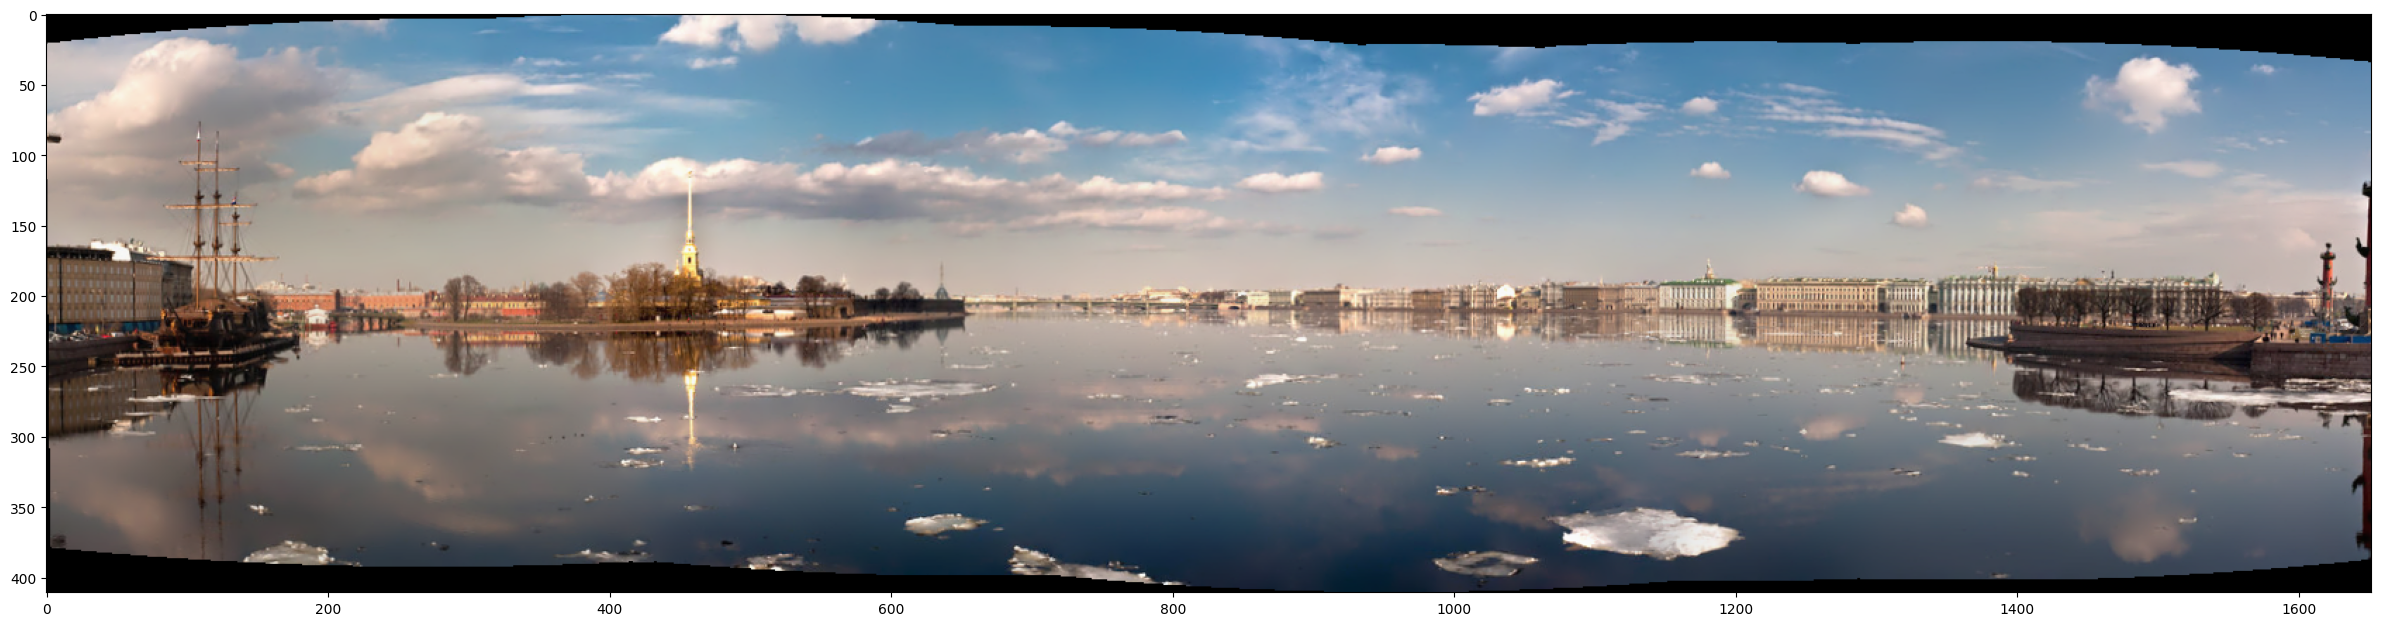

In [15]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)